## User Tutorial

### Instillation of Dependant Packages

[Anaconda](https://www.continuum.io/) is recommended to create a Python environment within which to use ipymd:

    conda create -n ipymd -c cjs14 ipymd
    source activate ipymd
    ipython notebook

In [1]:
import ipymd
print(ipymd.version())

0.4.2


### Basic Atom Creation and Visualisation

The input for a basic atomic visualisation, is a [pandas](http://pandas.pydata.org/) Dataframe that specifies the coordinates, size and color of each atom in the following manner:

In [2]:
import pandas as pd
df = pd.DataFrame(
        [[2,3,4,1,[0, 0, 255],1],
         [1,3,3,1,'orange',1],
         [4,3,1,1,'blue',1]],
        columns=['x','y','z','radius','color','transparency'])

Distances are measured in Angstroms, and colors can be defined in [r,g,b] format (0 to 255) or as a string defined in `available_colors`.

In [3]:
print(ipymd.available_colors()['reds'])

['light_salmon', 'salmon', 'dark_salmon', 'light_coral', 'indian_red', 'crimson', 'fire_brick', 'dark_red', 'red']


The `Visualise_Sim` class can then be used to setup a visualisation, which is returned in the form of a `PIL` image.

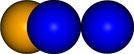

In [4]:
vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_atoms(df)
img1 = vis.get_image(size=400,quality=5)
img1

To convert this into an image viewable in IPython, simply parse it to the `visualise` function.

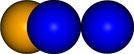

In [5]:
vis.visualise(img1)

Extending this basic procedure, additional objects can be added to the visualisation, the viewpoint can be rotated and multiple images can be output at once, as shown in the following example:

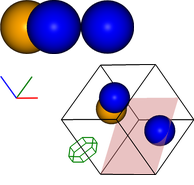

In [6]:
vis.add_axes(length=0.2, offset=(-0.3,0))
vis.add_box([[5,0,0],[0,5,0],[0,0,5]])
vis.add_plane([[5,0,0],[0,5,2]],alpha=0.3)
vis.add_hexagon([[1,0,0],[0,0,.5]],[0,0,2],color='green')

img_ex1 = vis.get_image(xrot=45, yrot=45)
#img2 = vis.draw_colorlegend(img2,1,2)
vis.visualise([img1,img_ex1])

### Atom Creation From Other Sources

The `ipymd.data_input` module includes a number of classes to automate the intial creation of the atoms Dataframe, from various sources. Most classes will return a sub-class of `DataInput`, with a `get_atoms` method to return the atoms Dataframe and a `get_simulation_box` method to return the vertexes and origin of the simulation box.

#### Crystal Parameters

This class allows atoms to be created in ordered crystal, as defined by their space group and crystal parameters:

In [7]:
data = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[5.4, 5.4, 5.4, 90, 90, 90], 
    repetitions=[5, 5, 5])

sim_abc, sim_origin = data.get_simulation_box()
print(sim_origin)
print(sim_abc)
atoms_df = data.get_atom_data()
atoms_df.head(2)

[ 0.  0.  0.]
[[  2.70000000e+01   0.00000000e+00   0.00000000e+00]
 [  1.65327318e-15   2.70000000e+01   0.00000000e+00]
 [  1.65327318e-15   1.65327318e-15   2.70000000e+01]]


id type             x    y    z  transparency         color  radius
0   1   Na  0.000000e+00  0.0  0.0           1.0  light_salmon     1.0
1   2   Na  3.306546e-16  2.7  2.7           1.0  light_salmon     1.0

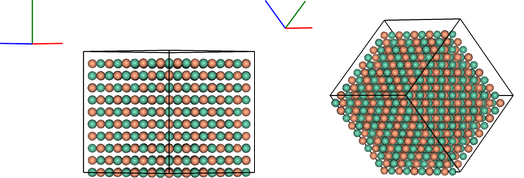

In [8]:
vis2 = ipymd.visualise_sim.Visualise_Sim()
vis2.add_axes()
vis2.add_box(sim_abc, sim_origin)
vis2.add_atoms(atoms_df)
images = [vis2.get_image(xrot=xrot,yrot=45) for xrot in [0,45]]
vis2.visualise(images, columns=2)

A dataframe is available which lists the alternative names for each space group:

In [9]:
df = ipymd.data_input.crystal.get_spacegroup_df()
df.loc[[1,194,225]]

System_type  Point group Short_name       Full_name Schoenflies  \
Number                                                                   
1        triclinic            1         P1             P 1     $C_1^1$   
194      hexagonal  6/m 2/m 2/m    P63/mmc  P 63/m 2/m 2/c  $D_{6h}^4$   
225          cubic    4/m 3 2/m       Fm3m     F 4/m 3 2/m     $O_h^5$   

       Fedorov                                          Shubnikov  Fibrifold  
Number                                                                        
1           1s                                   $(a/b/c)\cdot 1$          -  
194        88a                      $(c:(a/a))\cdot m:6_3\cdot m$          -  
225        73s  $\left ( \frac{a+c}{2}/\frac{b+c}{2}/\frac{a+b...  $2^{-}:2$

#### Crystallographic Information Files

.cif files are a common means to store crystallographic data and can be loaded as follows:

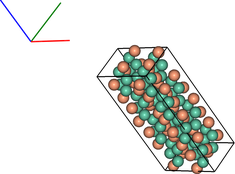

In [10]:
cif_path = ipymd.get_data_path('example_crystal.cif')
data = ipymd.data_input.cif.CIF(cif_path)
vis = ipymd.visualise_sim.Visualise_Sim()
vis.basic_vis(data.get_atom_data(), data.get_simulation_box(),
              xrot=45,yrot=45)

NB: at present, fractional occupancies of lattice sites are returned in the atom Dataframe, but cannot be visualised as such. It is intended that eventually occupancy will be visualised by partial spheres. 

In [11]:
data.get_atom_data().head(1)

type         x        y          z  occupancy  transparency         color  \
0   Fe  4.363536  2.40065  22.642804        1.0           1.0  light_salmon   

   radius  
0     1.0

#### Lammps Input Data

The input data for LAMMPS simulations (supplied to `read_data`) can be input. Note that the `get_atom_data` method requires that the atom_style is defined, in order to define what each data column refers to.

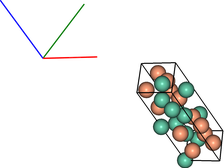

In [12]:
lammps_path = ipymd.get_data_path('lammps_input.data')
data = ipymd.data_input.lammps.LAMMPS_Input(lammps_path)

vis = ipymd.visualise_sim.Visualise_Sim()
vis.basic_vis(data.get_atom_data(atom_style='charge'), data.get_simulation_box(),xrot=45,yrot=45)

#### Lammps Output Data

Output data can be read in the form of a single file or, it is advisable for efficiency, that a single file is output for each timestep, where `*` is used to define the variable section of the filename. The `get_atoms` and `get_simulation_box` methods not take a variable to define which timestep is returned.

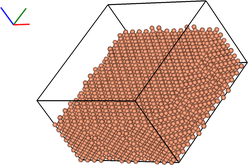

In [13]:
lammps_path = ipymd.get_data_path('atom_onefile.dump')
data = ipymd.data_input.lammps.LAMMPS_Output(lammps_path)

vis = ipymd.visualise_sim.Visualise_Sim()
vis.basic_vis(data.get_atom_data(98), data.get_simulation_box(98),
              spheres=True,xrot=45,yrot=45,quality=5)

98


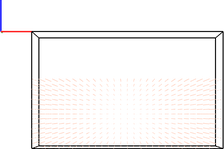

In [14]:
lammps_path = ipymd.get_data_path(['atom_dump','atoms_*.dump'])
data = ipymd.data_input.lammps.LAMMPS_Output(lammps_path)
print(data.count_timesteps())

vis = ipymd.visualise_sim.Visualise_Sim()
vis.basic_vis(data.get_atom_data(98), data.get_simulation_box(98),
              spheres=False,xrot=90,yrot=0)

### Atom Manipulation

The atoms Dataframe is already very easy to manipulate using the standard [pandas](http://pandas.pydata.org/) methods. But an `Atom_Manipulation` class has also been created to carry out standard atom manipulations, such as setting variables dependant on atom type or altering the geometry, as shown in this example:

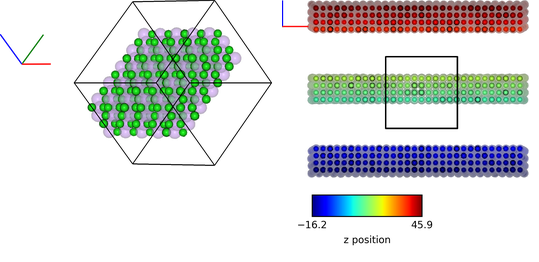

In [15]:
data = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[5.4, 5.4, 5.4, 90, 90, 90], 
    repetitions=[5, 5, 5])

manipulate_atoms = ipymd.atom_manipulation.Atom_Manipulation

new_df = manipulate_atoms(data.get_atom_data(),undos=2)

new_df.apply_map({'Na':1.5, 'Cl':1},'radius')
new_df.apply_map('color','color',default='grey')
new_df.change_type_variable('Na', 'transparency', 0.5)
new_df.slice_z(10,20)

vis2 = ipymd.visualise_sim.Visualise_Sim()
vis2.add_box(*data.get_simulation_box())
vis2.add_axes(offset=(-1.3,-0.7))
vis2.add_atoms(new_df.df, spheres=True)

img1 = vis2.get_image(xrot=45,yrot=45)

vis2.remove_atoms()
new_df.repeat_cell(data.get_simulation_box()[0],((-1,1),(-1,1),(-1,1)))
new_df.color_by_variable('z')
vis2.add_atoms(new_df.df, spheres=True)
img2 = vis2.get_image(xrot=90,yrot=0)

img3 = ipymd.plotting.create_colormap_image(new_df.df.z.min(), new_df.df.z.max(),
                                            horizontal=True,title='z position',size=150)

vis2.visualise([img1,img2, (280,1), img3], columns=2)

NB: default atom variables (such as color and radii can be set using the `apply_map` method and any column name from those given in `ipymd.shared.atom_data()`: 

In [16]:
ipymd.shared.atom_data().head(1)

Num  ARENeg  RCov   RBO  RVdW  MaxBnd     Mass  ElNeg  Ionization  \
Symb                                                                      
H       1     2.2  0.31  0.31   1.1       1  1.00794    2.2     13.5984   

      ElAffinity      Name color_chemlab color_chemlab_light            color  
Symb                                                                           
H       0.754204  Hydrogen         white                snow  (191, 191, 191)

### Geometric Analysis

Given the simple and flexible form of the atomic data and visualisation, it is now easier to add more complex geometric analysis. These analyses are being contained in the `atom_analysis` package, and some initial examples are detailed below. Functions in the `atom_analysis.nearest_neighbour` package are based on the `scipy.spatial.cKDTree` algorithm for identifying nearest neighbours.

#### Atomic Coordination

The two examples below show computation of the coordination of Na, w.r.t Cl, in a simple NaCl crystal (which should be 6). The first does not include a consideration of the repeating boundary conditions, and so outer atoms have a lower coordination number. But the latter computation provides a method which takes this into consideration, by repeating the Cl lattice in each direction before computation.

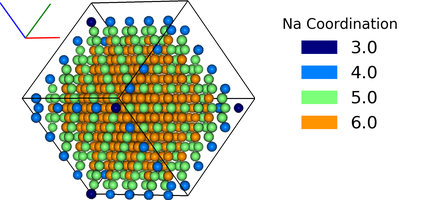

In [17]:
data = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[5.4, 5.4, 5.4, 90, 90, 90], 
    repetitions=[5, 5, 5])
df = data.get_atom_data()

df = ipymd.atom_analysis.nearest_neighbour.coordination_bytype(df, 'Na','Cl')

new_df = manipulate_atoms(df)
new_df.filter_variables('Na')
new_df.color_by_variable('coord_Na_Cl',minv=3,maxv=7)

vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_axes(offset=(0,-0.3))
vis.add_box(*data.get_simulation_box())
vis.add_atoms(new_df.df)

img = vis.get_image(xrot=45,yrot=45)

img2 = ipymd.plotting.create_legend_image(new_df.df.coord_Na_Cl,new_df.df.color, title='Na Coordination',size=150,colbytes=True)

vis.visualise([img,img2],columns=2)

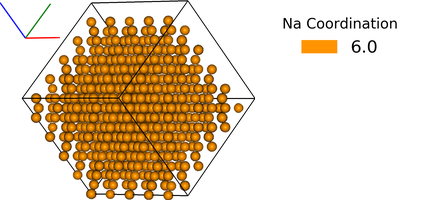

In [18]:
data = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[5.4, 5.4, 5.4, 90, 90, 90], 
    repetitions=[5, 5, 5])
df = data.get_atom_data()

df = ipymd.atom_analysis.nearest_neighbour.coordination_bytype(
    df, 'Na','Cl',repeat_vectors=data.get_simulation_box()[0])

new_df = manipulate_atoms(df)
new_df.filter_variables('Na')
new_df.color_by_variable('coord_Na_Cl',minv=3,maxv=7)

vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_box(*data.get_simulation_box())
vis.add_axes(offset=(0,-0.3))
vis.add_atoms(new_df.df)

img = vis.get_image(xrot=45,yrot=45)

img2 = ipymd.plotting.create_legend_image(new_df.df.coord_Na_Cl,new_df.df.color, title='Na Coordination',size=150,colbytes=True)

vis.visualise([img,img2],columns=2)

#### Atomic Structure Comparison

`compare_to_lattice` takes each atomic coordinate in df1 and computes the distance to the nearest atom (i.e. lattice site) in df2:

In [19]:
import numpy as np
data1 = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[5.4, 5.4, 5.4, 90, 90, 90], 
    repetitions=[5, 5, 5])
df1 = data1.get_atom_data()

print(('Average distance to nearest atom (identical)', 
       np.mean(ipymd.atom_analysis.nearest_neighbour.compare_to_lattice(df1,df1))))

data2 = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[5.41, 5.4, 5.4, 90, 90, 90], 
    repetitions=[5, 5, 5])
df2 = data2.get_atom_data()

print(('Average distance to nearest atom (different)', 
       np.mean(ipymd.atom_analysis.nearest_neighbour.compare_to_lattice(df1,df2))))


('Average distance to nearest atom (identical)', 0.0)
('Average distance to nearest atom (different)', 0.022499999999999343)


#### Common Neighbour Analysis (CNA)

CNA ([Honeycutt and Andersen, J. Phys. Chem. 91, 4950](http://dx.doi.org/10.1021/j100303a014)) is an algorithm to compute a signature for pairs of atoms, which is designed to characterize the local structural environment. Typically, CNA is used as an effective filtering method to classify atoms in crystalline systems ([Faken and Jonsson, Comput. Mater. Sci. 2, 279](http://dx.doi.org/10.1016/0927-0256(94%2990109-0)), with the goal to get a precise understanding of which atoms are associated with which phases, and which are associated with defects.

Common signatures for nearest neighbours are:

- FCC = 12 x 4,2,1
- HCP = 6 x 4,2,1 & 6 x 4,2,2
- BCC = 6 x 6,6,6 & 8 x 4,4,4
- Diamond = 12 x 5,4,3 & 4 x 6,6,3

which are tested below:

In [20]:
data = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0]], ['Al'], 
    225, cellpar=[4.05, 4.05, 4.05, 90, 90, 90], 
    repetitions=[5, 5, 5])
fcc_vector = data.get_simulation_box()[0]
fcc_df = data.get_atom_data()

data = ipymd.data_input.crystal.Crystal(
    [[0.33333,0.66667,0.25000]], ['Mg'], 
    194, cellpar=[3.21, 3.21, 5.21, 90, 90, 120], 
    repetitions=[5,5,5])
hcp_vector = data.get_simulation_box()[0]
hcp_df = data.get_atom_data()

data = ipymd.data_input.crystal.Crystal(
    [[0,0,0]], ['Fe'], 
    229, cellpar=[2.866, 2.866, 2.866, 90, 90, 90], 
    repetitions=[5,5,5])
bcc_vector = data.get_simulation_box()[0]
bcc_df = data.get_atom_data()

data = ipymd.data_input.crystal.Crystal(
    [[0,0,0]], ['C'], 
    227, cellpar=[3.57, 3.57, 3.57, 90, 90, 90], 
    repetitions=[2,2,2])
diamond_vector = data.get_simulation_box()[0]
diamond_df = data.get_atom_data()

In [21]:
print(ipymd.atom_analysis.nearest_neighbour.cna_sum(fcc_df,repeat_vectors=fcc_vector))
print(ipymd.atom_analysis.nearest_neighbour.cna_sum(hcp_df,repeat_vectors=hcp_vector))
print(ipymd.atom_analysis.nearest_neighbour.cna_sum(bcc_df,repeat_vectors=bcc_vector))
print(ipymd.atom_analysis.nearest_neighbour.cna_sum(diamond_df,upper_bound=10,max_neighbours=16,repeat_vectors=diamond_vector))

Counter({'4,2,1': 6000})
Counter({'4,2,2': 1500, '4,2,1': 1500})
Counter({'6,6,6': 2000, '4,4,4': 1500})
Counter({'5,4,3': 768, '6,6,3': 256})


For each atom, the CNA for each nearest-neighbour can be output:

In [22]:
ipymd.atom_analysis.nearest_neighbour.common_neighbour_analysis(hcp_df,repeat_vectors=hcp_vector).head(5)

id type         x         y        z  transparency         color  radius  \
0   1   Mg -0.000016  1.853304   1.3025           1.0  light_salmon     1.0   
1   2   Mg  1.605016  0.926638   3.9075           1.0  light_salmon     1.0   
2   3   Mg -0.000016  1.853304   6.5125           1.0  light_salmon     1.0   
3   4   Mg  1.605016  0.926638   9.1175           1.0  light_salmon     1.0   
4   5   Mg -0.000016  1.853304  11.7225           1.0  light_salmon     1.0   

                          cna  
0  {u'4,2,2': 6, u'4,2,1': 6}  
1  {u'4,2,2': 6, u'4,2,1': 6}  
2  {u'4,2,2': 6, u'4,2,1': 6}  
3  {u'4,2,2': 6, u'4,2,1': 6}  
4  {u'4,2,2': 6, u'4,2,1': 6}

This can be used to produce a plot identifying likely structure of an unknown structure:

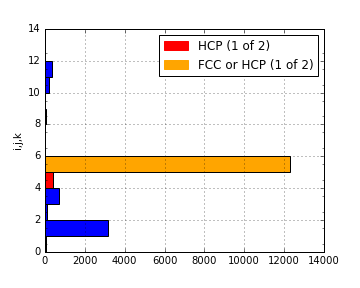

In [23]:
lammps_path = ipymd.get_data_path('thermalized_troilite.dump')
data = ipymd.data_input.lammps.LAMMPS_Output(lammps_path)
df = data.get_atom_data(0)
df = df[df.type==1]
plot = ipymd.atom_analysis.nearest_neighbour.cna_plot(df,repeat_vectors=data.get_simulation_box(0)[0])
plot.display_plot()

A visualisation of the probable local character of each atom can also be created. Note the *accuracy* parameter in the `cna_categories` method allows for more robust fitting to the ideal signatures:

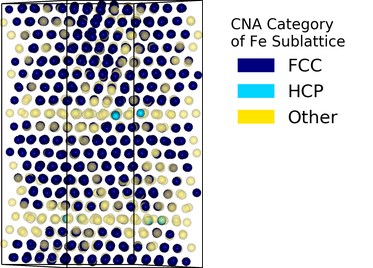

In [24]:
lammps_path = ipymd.get_data_path('thermalized_troilite.dump')
data = ipymd.data_input.lammps.LAMMPS_Output(lammps_path)

df = data.get_atom_data()
df = df[df.type==1]
df = ipymd.atom_analysis.nearest_neighbour.cna_categories(
    df,repeat_vectors=data.get_simulation_box()[0],accuracy=0.7)
manip = ipymd.atom_manipulation.Atom_Manipulation(df)
manip.color_by_categories('cna')
#manip.apply_colormap({'Other':'blue','FCC':'green','HCP':'red'}, type_col='cna')
manip.change_type_variable('Other','transparency',0.5,type_col='cna')
atom_df = manip.df

vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_box(*data.get_simulation_box())
vis.add_atoms(atom_df)

img = vis.get_image(xrot=90)

img2 = ipymd.plotting.create_legend_image(atom_df.cna,atom_df.color, 
                title='CNA Category\nof Fe Sublattice',size=150,colbytes=True)

vis.visualise([img,img2],columns=2)

#### Vacany Identification

The `vacancy_identification` method finds grid sites with no atoms within a specified distance:

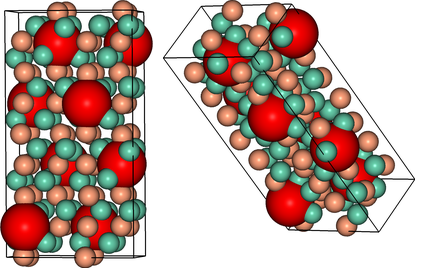

In [25]:
cif_path = ipymd.get_data_path('pyr_4C_monoclinic.cif')
data = ipymd.data_input.cif.CIF(cif_path)
cif4c_df, (cif4c_abc, cif4c_origin) = data.get_atom_data(), data.get_simulation_box()
vac_df = ipymd.atom_analysis.nearest_neighbour.vacancy_identification(cif4c_df,0.2,2.3,cif4c_abc,
                                         radius=2.3,remove_dups=True)
vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_atoms(vac_df)
vis.add_box(cif4c_abc)
vis.add_atoms(cif4c_df)
vis.visualise([vis.get_image(xrot=90,yrot=10),
               vis.get_image(xrot=45,yrot=45)],columns=2)

#### XRD Spectrum Prediction

This is an implementation of the virtual x-ray diffraction pattern algorithm, from http://http://dx.doi.org/10.1007/s11837-013-0829-3.

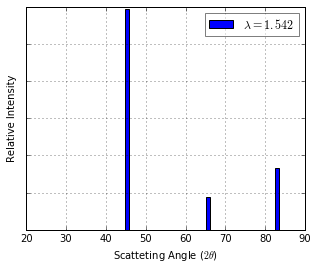

In [26]:
data = ipymd.data_input.crystal.Crystal(
    [[0,0,0]], ['Fe'], 
    229, cellpar=[2.866, 2.866, 2.866, 90, 90, 90], 
    repetitions=[5,5,5])

sim_abc, sim_origin = data.get_simulation_box()
atoms_df = data.get_atom_data()

wlambda = 1.542 # Angstrom (Cu K-alpha)
thetas, Is = ipymd.atom_analysis.spectral.compute_xrd(atoms_df,sim_abc,wlambda)
plot = ipymd.atom_analysis.spectral.plot_xrd_hist(thetas,Is,wlambda=wlambda,barwidth=1)
plot.axes.set_xlim(20,90)
plot.display_plot(True)

The predicted spectrum peaks (for alpha-Fe) shows good correlation with experimentally derived data:

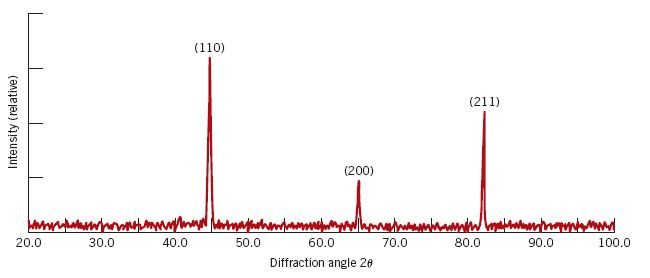

In [27]:
from IPython.display import Image
exp_path = ipymd.get_data_path('xrd_fe_bcc_Cu_kalpha.png',
                          module=ipymd.atom_analysis)
Image(exp_path,width=380)

### System Analysis

Within the `LAMMPS_Output` class there is also the option to read in a systems data file, with a log of global variables for each simulation timestep.

In [28]:
data = ipymd.data_input.lammps.LAMMPS_Output(
    sys_path=ipymd.get_data_path('system.dump'))

In [29]:
sys_data = data.get_system_data()
sys_data.tail()

time  natoms         a         b            vol        press       temp  \
94  18800    5880  4.000919  4.000920  106961.684112  3984.476256  20.821004   
95  19000    5880  4.002667  4.002667  107055.104770  3457.822223  20.543535   
96  19200    5880  3.995696  3.995696  106682.545808  1880.020740  14.949236   
97  19400    5880  3.990131  3.990134  106385.666301   499.341106  21.315529   
98  19600    5880  3.979611  3.979609  105825.294988 -2300.315883  17.161320   

             peng        keng           teng           enth  
94 -576758.385663  364.871078 -576393.514586 -570178.024689  
95 -576743.788115  360.008650 -576383.779465 -570985.120033  
96 -576635.072775  261.973143 -576373.099632 -573448.059018  
97 -576735.710976  373.537223 -576362.173753 -575587.433134  
98 -576652.409368  300.738098 -576351.671270 -579901.871560

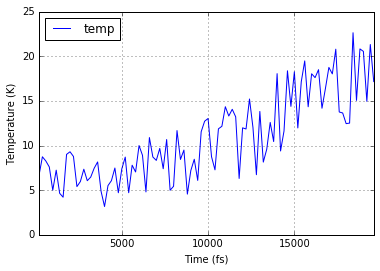

In [30]:
ax = sys_data.plot('time','temp')
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Temperature (K)');
ax.grid()

### Plotting

Plotting is handled by the `Plotter` class, which is mainly a useful wrapper around `matplotlib`.

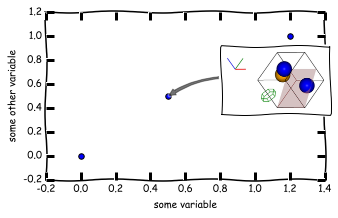

In [31]:
with ipymd.plotting.style('xkcd'):
    plot = ipymd.plotting.Plotter(figsize=(5,3))
    plot.axes.scatter([0,0.5,1.2],[0,0.5,1],s=30)
    plot.axes.set_xlabel('some variable')
    plot.axes.set_ylabel('some other variable')
    plot.add_image_annotation(img_ex1,(230,100),(0.5,0.5),zoom=0.5)
    plot.display_plot(tight_layout=True)

Matplotlib also has an animation capability:

In [38]:
import numpy as np
x_iter = [np.linspace(0, 2, 1000) for i in range(100)]
def y_iter(x_iter):
    for i,x in enumerate(x_iter):
        yield np.sin(2 * np.pi * (x - 0.01 * i))
        
with ipymd.plotting.style('ggplot'):
    line_anim = ipymd.plotting.animation_line(x_iter,y_iter(x_iter),
                                              xlim=(0,2),ylim=(-2,2),incl_controls=False)
line_anim

Recent IPython Notebook version have brought powerful new interactive features, such as Javascript widgets:

One could imagine using this feature to overlay time-dependant field information on to 2D visualiations of atomic configurations:


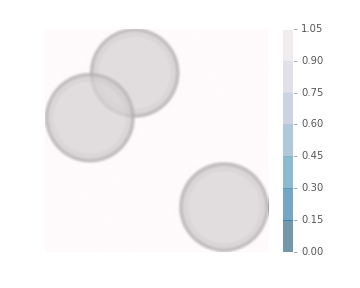
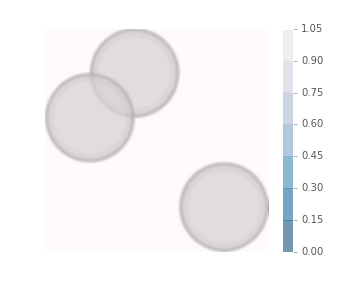
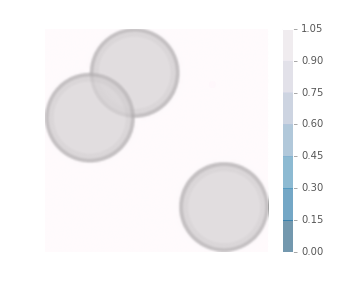
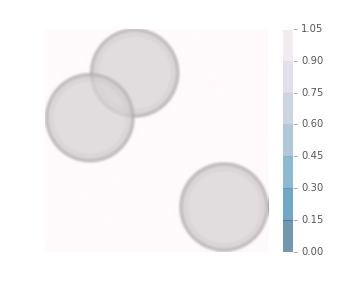
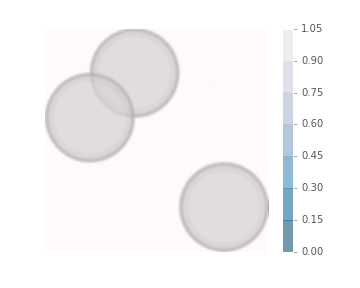
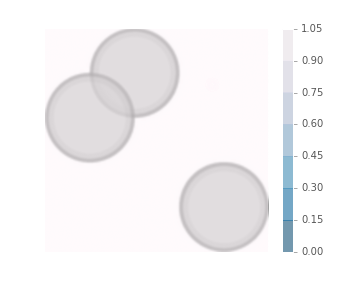
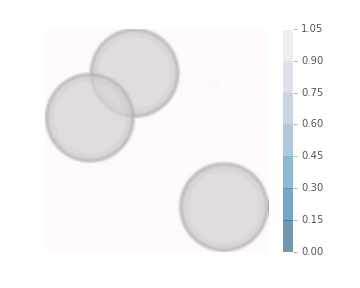
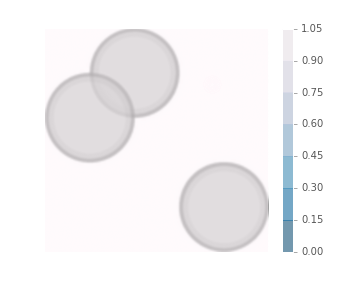
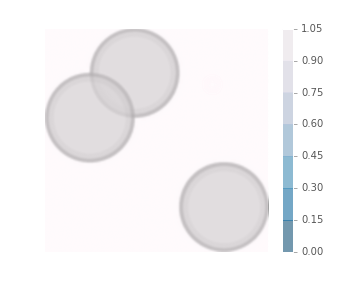
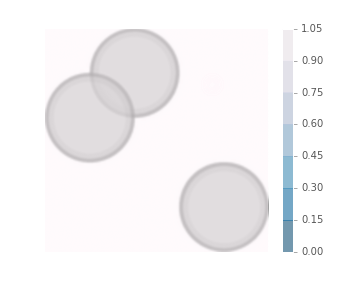
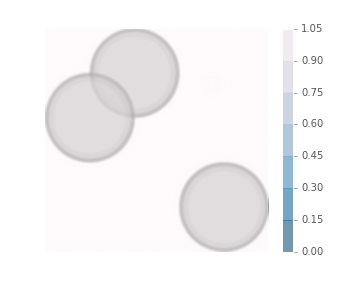
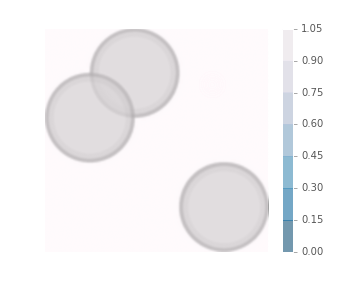
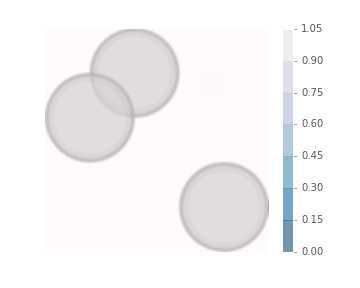
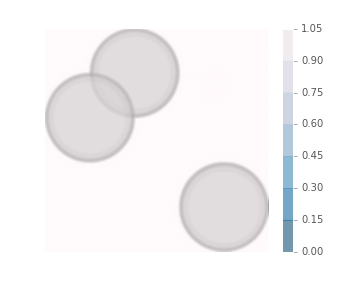
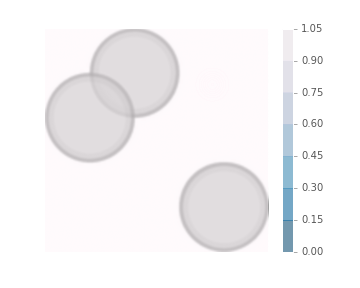
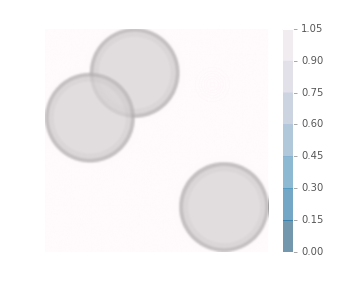
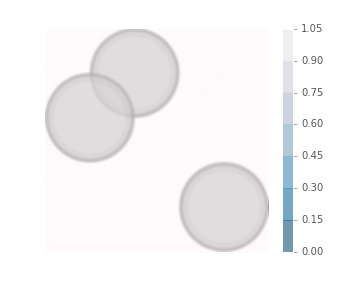
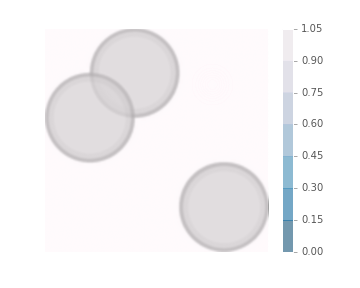
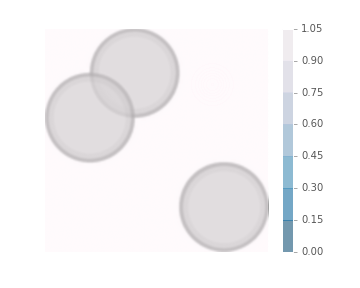
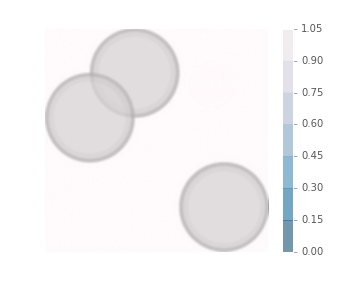
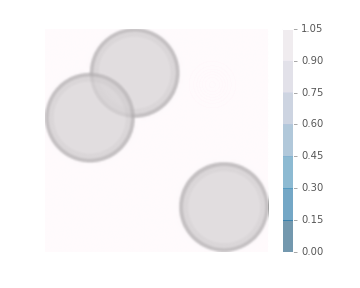
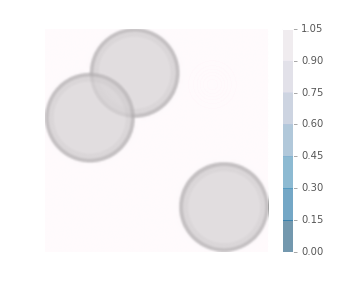
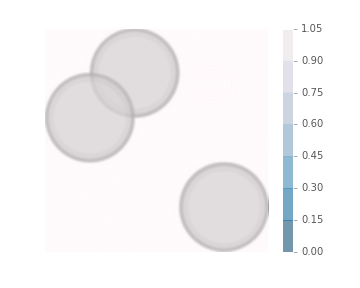
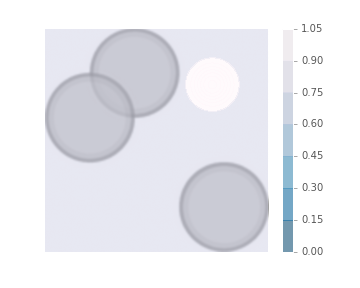
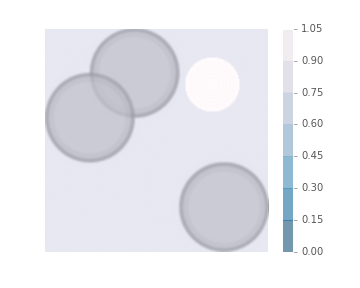
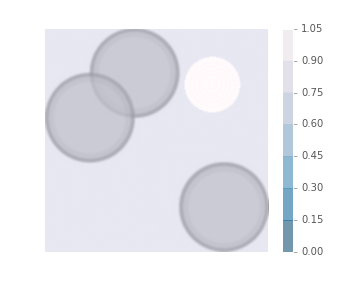
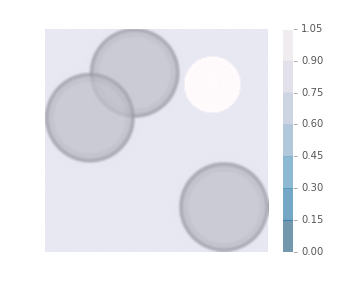
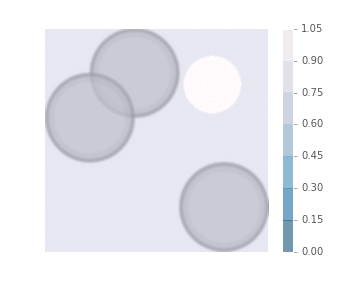
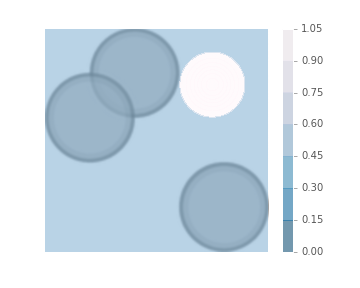
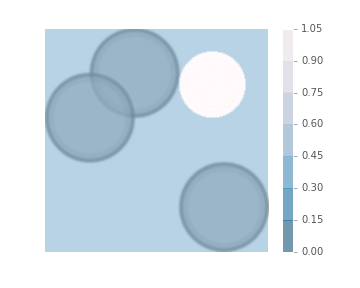
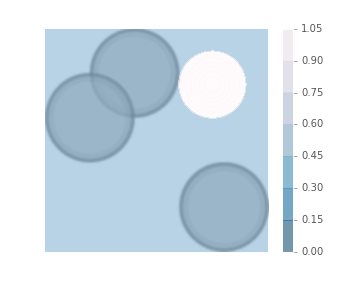
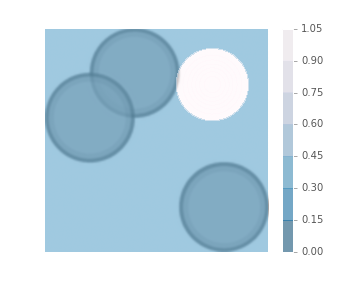
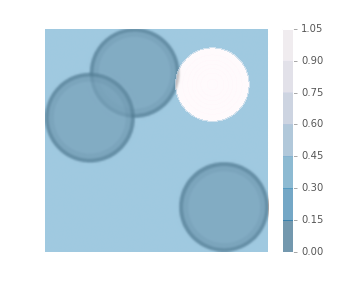
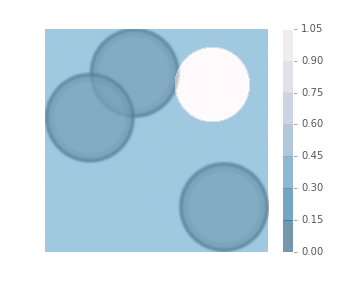
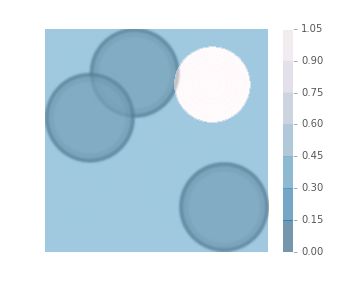
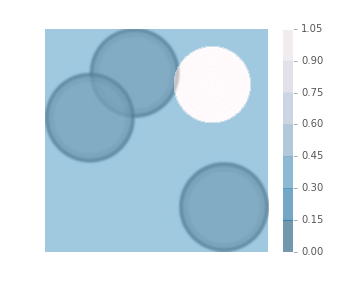
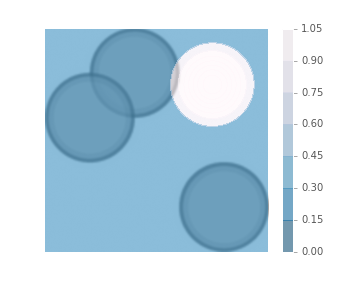
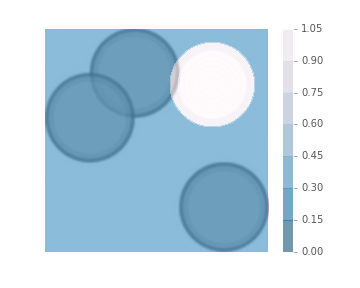
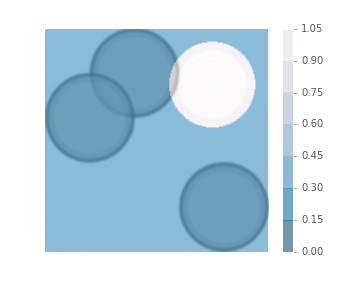
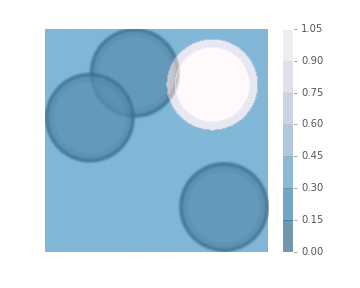
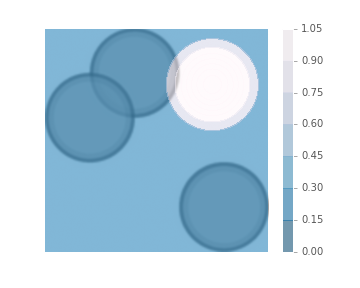
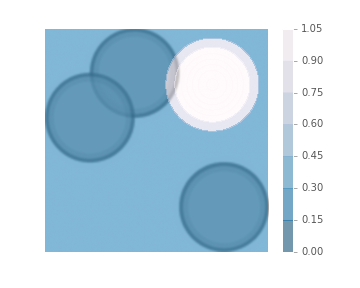
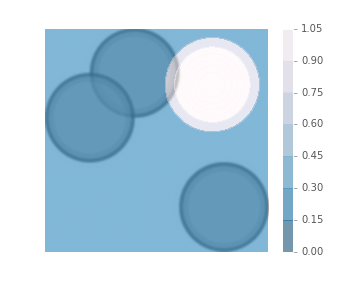
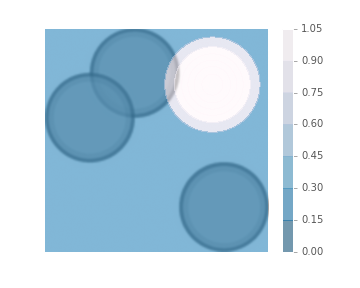
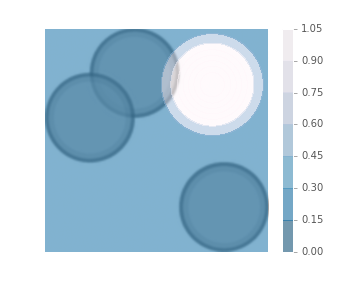
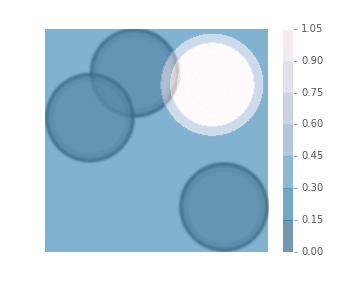
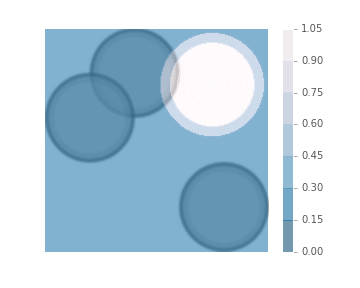
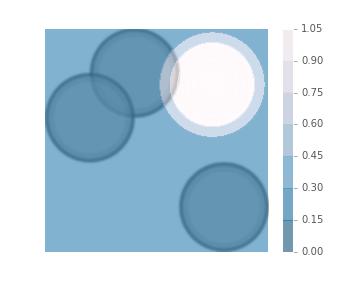
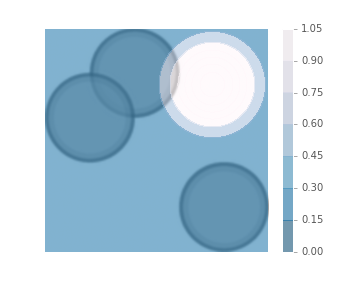
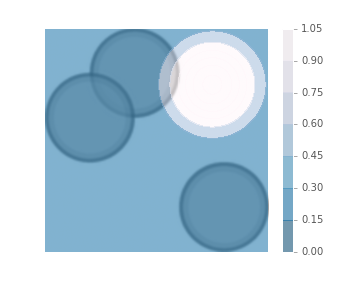
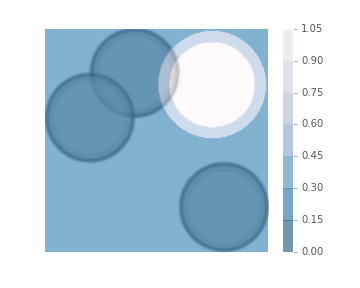
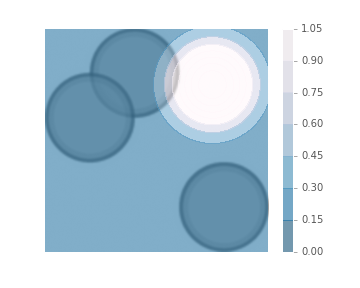
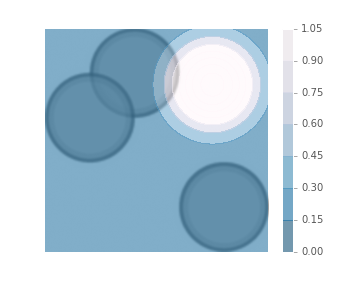
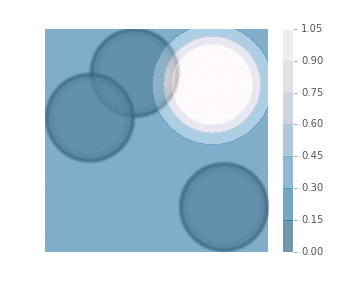
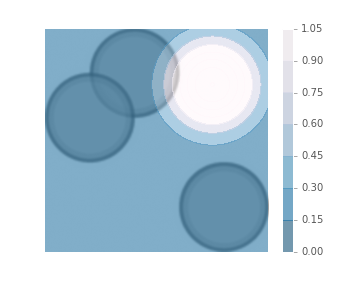
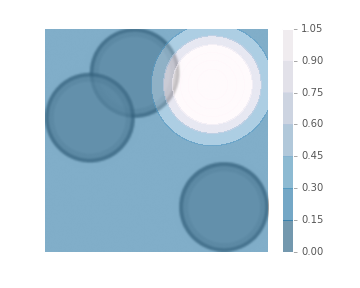
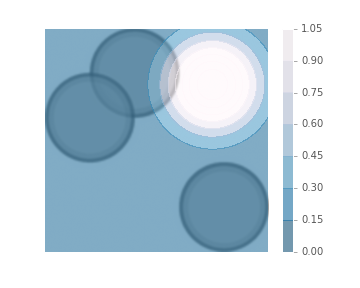
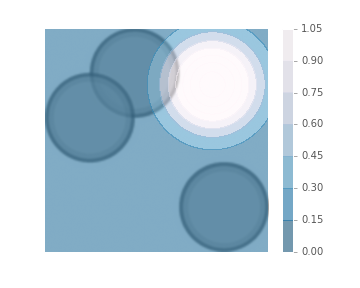
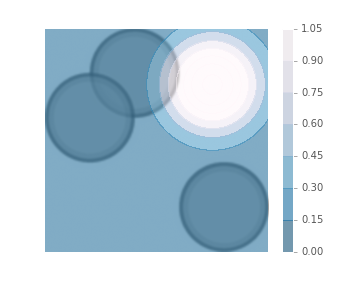
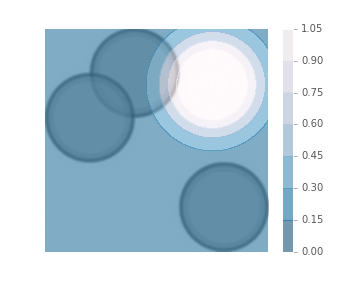
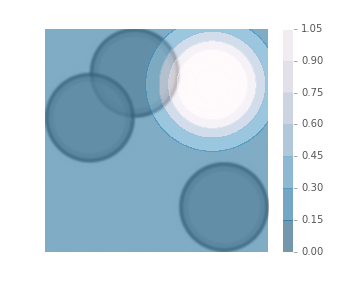
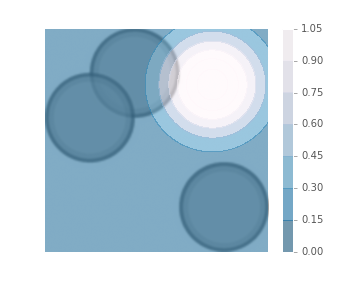
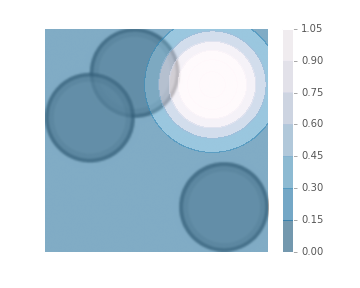
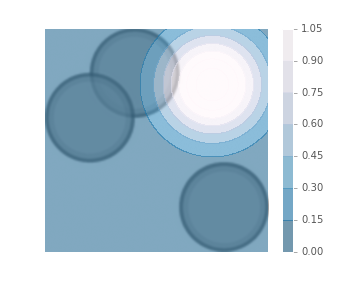
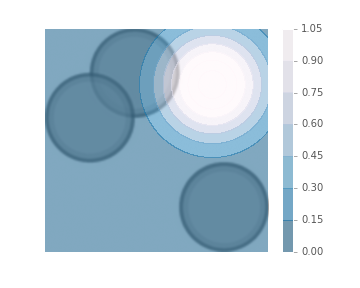
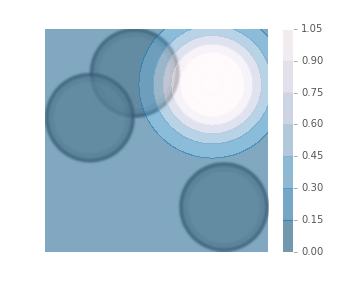
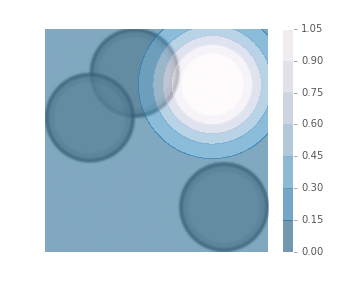
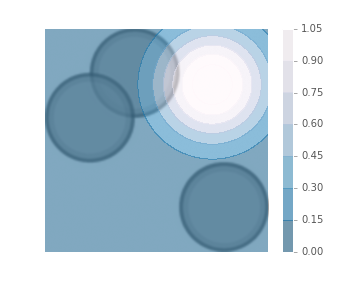
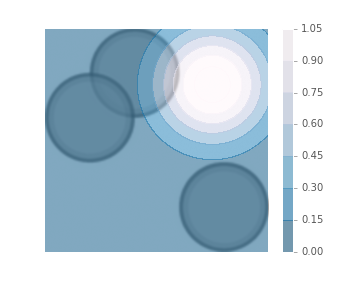
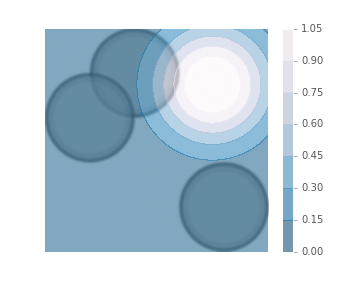
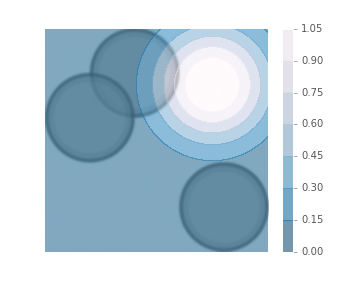
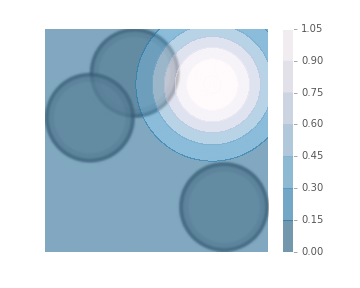
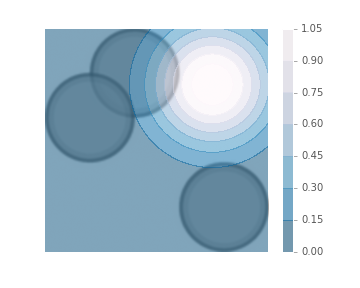
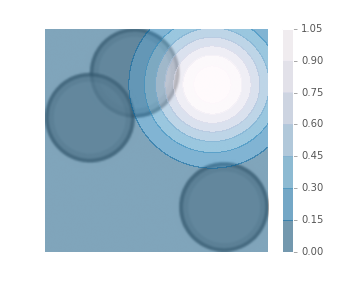
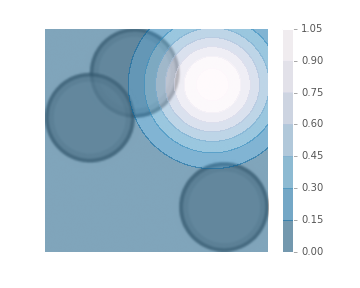
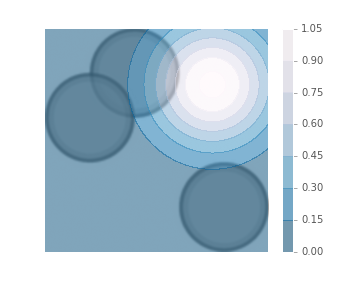
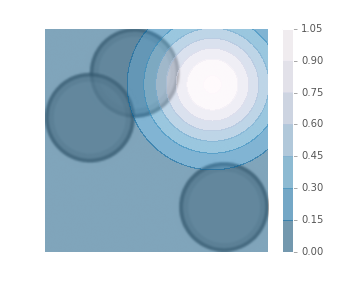
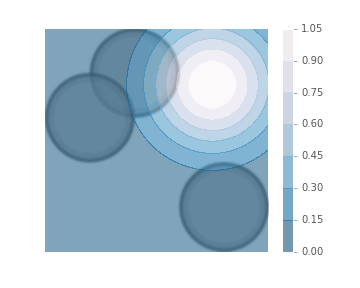
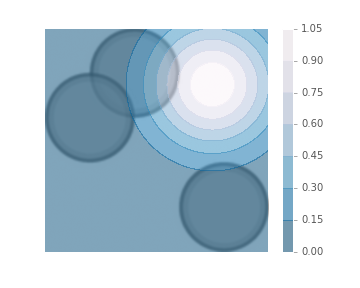
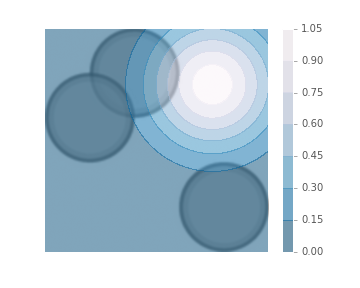
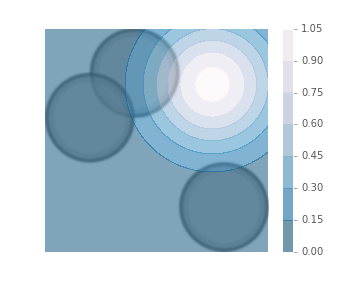
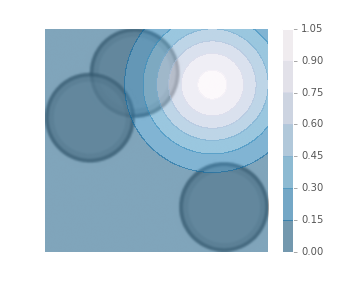
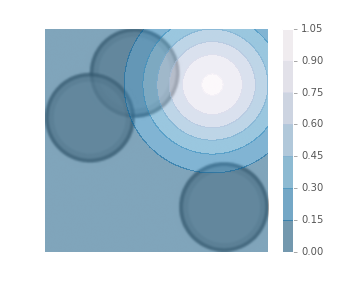
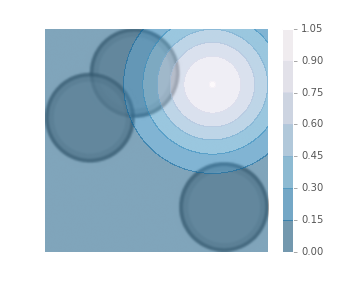
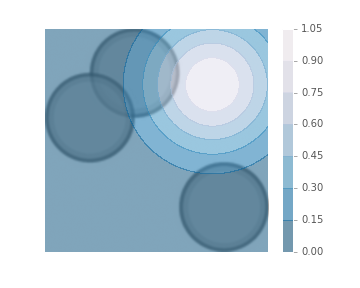
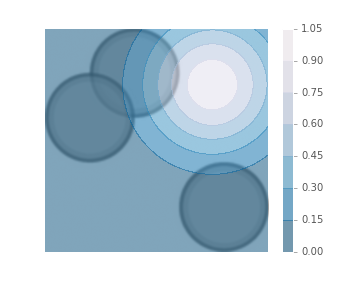
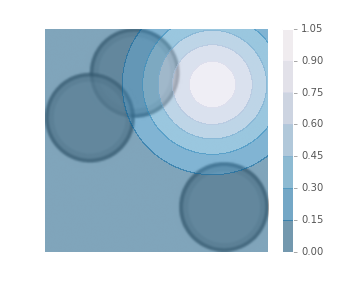
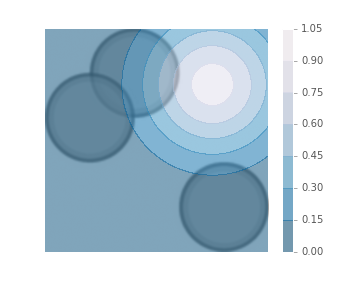
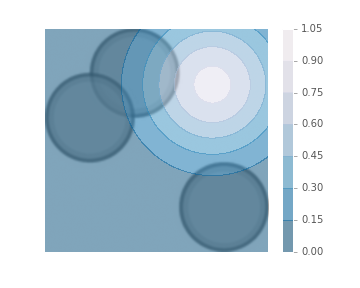
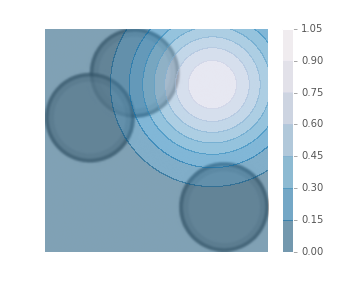
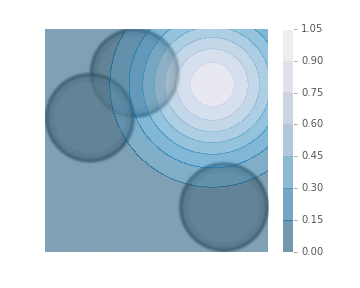
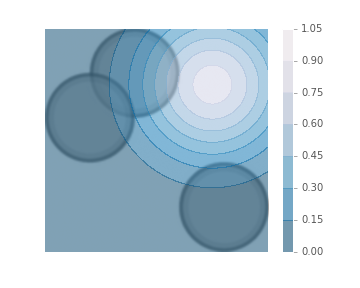
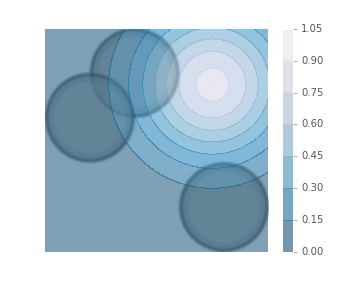
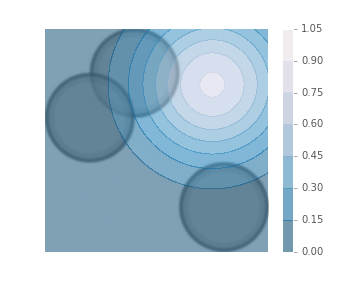
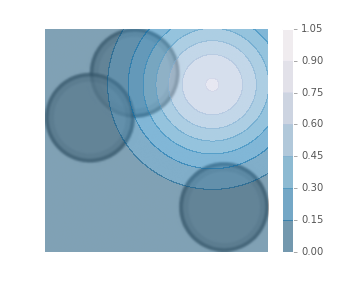
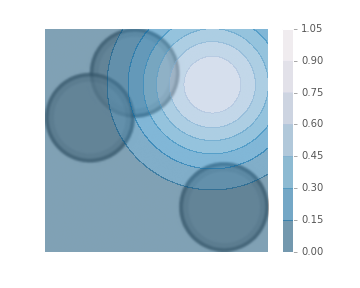
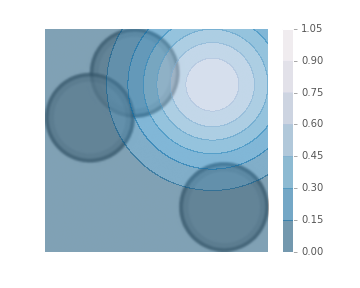
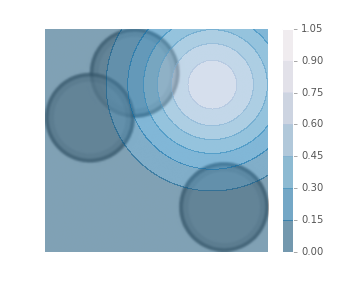
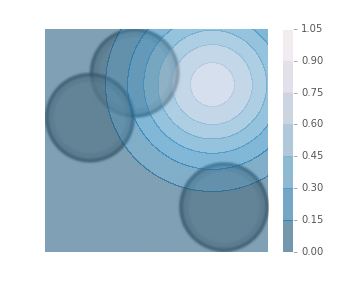
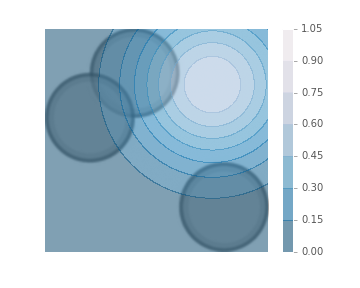

In [37]:
# visualise atoms
df = pd.DataFrame(
        [[2,3,4,1,'gray',0.6],
         [1,3,3,1,'gray',0.6],
         [4,3,1,1,'gray',0.6]],
        columns=['x','y','z','radius','color','transparency'])
vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_atoms(df,illustrate=True)
img1 = vis.get_image(size=400,quality=5,xrot=90)

plot = ipymd.plotting.Plotter()
plot.add_image(img1,width=2,height=2,origin=(-1,-1))

# setup contour iterators
import numpy as np
from itertools import izip
from matplotlib.mlab import bivariate_normal

x_iter = [np.linspace(-1, 1, 1000) for i in range(100)]
y_iter = [np.linspace(-1, 1, 1000) for i in range(100)]
def z_iter(x_iter,y_iter):
    for i,(x,y) in enumerate(izip(x_iter,y_iter)):
        X, Y = np.meshgrid(x, y)
        yield bivariate_normal(X, Y, 0.005*(i+1), 0.005*(i+1),0.5,0.5)

# create contour visualisation
with ipymd.plotting.style('ggplot'):
    c_anim = ipymd.plotting.animation_contourf(x_iter,y_iter,z_iter(x_iter,y_iter),
                                      xlim=(-1,1),ylim=(-1,1),
                                      cmap='PuBu_r',alpha=0.5,plot=plot)
c_anim